<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Hierarchical Clustering

_Authors: David Yerrington (DC)_

---

![](https://snag.gy/J8iyBj.jpg)

### Learning Objectives
*After this lesson, you will be able to:*
- Learn the hierarchical clustering algorithm
- Understand the differences between K-Means and hierarchical clustering
- Understand the difference between agglomerative clustering and divisive clustering
- Plot, analyze, and understand the Dendrogram
- Learn about the cophenetic correlation coefficient
- Practice hierarchical clustering on language data
- Gain an intuition for how clusters are selected with an interactive visualization

### Lesson Guide
- [What is hierarchical clustering?](#what-is)
- [When does hierarchical clustering perform well?](#when)
- [How is hierarchical clustering different from K-Means clustering?](#how)
- [How does hierarchical clustering work?](#how-work)
- [Single linkage: step-by-step](#single)
- [Hierarchical clustering in python](#python)
    - [Evaluation with the cophenetic correlation coefficient](#coph)
- [Intuition behind the cophenetic correlation coefficient](#intuition)
- [Visualizing hierarchical clustering on language skills data](#guided-practice)
- [Conclusion](#conclusion)
- [Additional resources](#resources)

<a name="what-is"></a>
## What is hierarchical clustering?

---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests: 

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a **dendrogram** - a graph that displays all of these links in their hierarchical structure.

![denex](./assets/denex.png)

To find clusters in a dendrogram, we can cut the graph to find the clusters - we'll go over this later in the lesson. 


<a id='when'></a>
## When does hierarchical clustering perform well?

---

- Hierarchical clustering works well for non-spherical clusters
- It also works well on smaller datasets - _this algorithm has a longer computational time and doesn't work well for larger datasets_

$$O(n^2 * n\ features)$$

### Hierarchical clustering works well for instances where we are working with frequencies. 

For instance - I've tallied the amount of times a certain skill exists in a collection of resumes.  **Since k-means computes *means*, this wouldn't give us very good clusters!**

<a id='how'></a>
## How is hierarchical clustering different from K-Means clustering?
---

![](https://snag.gy/tfzWw6.jpg)

Hierarchical clustering, like K-Means, is an unsupervised learning algorithm to divide our data into groups. In K-Means clustering the algorithm groups data into a pre-defined set of clusters based on determining centroid points for the K clusters, calculating the geometric mean of classified points, then moving the centroid until no points change class.

**In hierarchical clustering, the algorithm builds classification trees using the data that merge groups of similar data points.**

In K-Means, the boundaries between the various clusters are distinct and independent (see graph), whereas in hierarchical clustering there are shared similarities between those groups represented by the classification tree.  

**Hierarchical clustering does not require you to define "K" as an input!**

![kmeans](./assets/kmeans.png)


**K-Means**
- Aims to to achieve separation.
- Partitions are independent of each other.

**Hierachical Clustering**
- Partitions can be visualized using a tree structure (a dendrogram).
- Does not need the number of clusters as input.
- Possible to view partitions at different levels of granularities (i.e., can refine/coarsen clusters) using different K/
- Guaranteed to converge to the same solution (no random initialization).


<a name="how-work"></a>
## How does hierarchical clustering work?

---

There are two forms of hierarchical clustering; **agglomerative hierarchical clustering** and **divisive hierarchical clustering**. 
- Agglomerative goes from the bottom-up, starting with single data points and merging them into groups.
- Divisive goes from the top down, starting with all the data points and dividing them.

Whether starting from the top or bottom, at each step the algorithm makes the best choice it can to join or split the data based on the current sample. The hope is that these neighborhood best choices will approximate or equal the global best choice for clusters. It is an example of a **greedy algorithm**.


![](./assets/hier.png)

Today, we'll look at one of the fundamental methods for agglomerative hierarchical clustering: **linkage clustering**. Linkage clustering iterates through datapoints and computes the distance between groups by computing the distance between two neighboring datapoints, using the **nearest neighbor** technique similar to KNN.

> _Note: A **greedy algorithm** is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum._

<a id='single'></a>
## "Single linkage" step-by-step

---

> **Note:** This walkthrough is for the agglomerative strategy.


"Single linkage" is also known as minimum distance clustering or nearest neighbor clustering.


<table>
    <tr>
        <td>![](https://snag.gy/SDZyGz.jpg)</td>
        <td>Distance between two clusters is defined by the minimum distance between objects of the two clusters. 
</td>
    </tr>
        
</table>



### First let's consider a single series of distances between X/Y points in 2D space, represented as a matrix.
<table>
    <tr>
        <td>![](https://snag.gy/EcRNns.jpg)</td>
        <td>
        <ul><li>_Each feature, A-F, would be considered a "cluster".  All points are clusters._</li>
        <li>In each step of the iteration, we find the closest pair clusters.</li>
        <li>Our end goal is to ultimately cluster all of these to one single cluster.</li>
        <li>**In this case, the closest cluster is between cluster F and D with shortest distance of 0.5.**</li>
        </ul>
        <br>
        **Thus, we group cluster D and F into cluster (D, F)**
        </td>
    </tr>
        
</table>








<table>
    <tr>
        <td width="350">![](https://snag.gy/siCURp.jpg)</td>
        <td>
        <li>D and F turn into a cluster</li>
        <li>Distance matrix is updated (distance between ungrouped clusters do not change)</li>
        <br>
        **Now the problem is how to calculate distance between newly grouped clusters (D, F) and other clusters?**
        </td>
    </tr>
        
</table>

<table>
    <tr>
        <td width="350">![](https://snag.gy/lXQDf2.jpg)</td>
        <td>This is where our linkage function starts to do some work.
        <br>
        <ul>
            <li>Using single linkage, we specify minimum distance between original objects of the two clusters.</li>
            <li>Using single linkage, we find the minimum point from cluster ${d,f}$ to all other "clusters"</li>
            <ol>$d(d,f)\rightarrow a = min(d_{DA}, d_{FA}) = min(3.61, 3.20) = 3.20$</ol>
            <ol>$d(d,f)\rightarrow b = min(d_{DB}, d_{FB}) = min(2.92, 2.50) = 2.50$</ol>
            <ol>$d(d,f)\rightarrow c = min(d_{DC}, d_{FC}) = min(2.24, 2.50) = 2.24$</ol>
            <ol>$d(d,f)\rightarrow e = min(d_{DE}, d_{FE}) = min(1.00, 1.12) = 1.00$</ol>
        </ul>
        </td>
    </tr>

</table>





<table>
    <tr>
        <td width="350">![](https://snag.gy/syM7BH.jpg)</td>
        <td>**Cluster B and cluster A is now 0.71, wich creates cluster name "(A, B)"**
        <br>
        <ul>
            <li>Now we update the distance matrix. </li>
            <li>Using the **original** input distance matrix (size 6 by 6), distance between cluster C and cluster (D, F) is computed as </li>
            <ol>$d_{(c)\rightarrow (a,b)} = min(d_{CA}, d_{CB}) = min(5.66, 4.95) = 4.95$<br><br></ol>
            <li>Distance between cluster (D, F) and cluster (A, B) is the minimum distance between all objects involves in the two clusters </li>
            <ol>$d_{(d,f)\rightarrow (a,b)} = min(d_{DA}, d_{DB}, d_{FA}, d_{FB}) = min(2.61, 2.92, 3.20, 2.50) = 2.50$<br><br></ol>
            <li>Now we compute $e$ and $(a,b)$</li>
            <ol>$d(e)\rightarrow (a,b) = min(d_{E}, d_{AB}) = min(4.24, 3.54) = 3.54$</ol>
        </ul>
        </td>
    </tr>

</table>

<table>
    <tr>
        <td width="350">![](https://snag.gy/Tg4V6J.jpg)</td>
        <td>**Here's our updated distance matrix**
        <ol>$d_{((D,F),E)\rightarrow(AB)} = MIN(d_{DA},d_{DB},d_{FA},d_{FB},d_{EB}) = MIN(3.61, 2.92, 3.20, 2.50, 4.24, 3.54) = 2.50$</ol>
        <ol>$d_{(D,F), E)\rightarrow C} = MIN(d_{DF}, d_{FC}, d_{EC}) = MIN(2.24,2.50,1.41) = 1.41$</ol>
        </td>
    </tr>
</table>

![](https://snag.gy/lrdR8b.jpg)
<ol>$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(d_{DA},d_{DB},d_{FA}, d_{FB}, d_{EA}, d_{EB}, d_{CA}, d_{CB})$</ol>
<ol>$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(3.61,2.92,3.20,2.50,4.24,3.54, 5.66, 4.95) = 2.50$</ol>

<ol>

          <li>In the beginning we have 6 clusters: A, B, C, D, E and F </li>

          <li>We merge cluster D and F into cluster (D, F) at distance<strong> 0.50</strong> </li>

          <li>We merge cluster A and cluster B into (A, B) at distance <strong>0.71</strong> </li>

          <li>We merge cluster E and (D, F) into ((D, F), E) at distance <strong>1.00</strong> </li>

          <li>We merge cluster ((D, F), E) and C into (((D, F), E), C) at distance <strong>1.41</strong> </li>

          <li>We merge cluster (((D, F), E), C) and (A, B) into ((((D, F), E), C), (A, B)) at distance <strong>2.50</strong> </li>

          <li>The last cluster contains all the objects, thus concluding the computation </li>

</ol>

<br>
<center>**Our final result can be represented in terms of a dendogram such as:**</center>

![](https://snag.gy/NJ2lxe.jpg)

<a id='python'></a>
## Hierarchical clustering in python

---

Implementing hierarchical clustering in python is as simple as calling a function from the SciPy toolbox:

```python
Z = linkage(X, 'ward')
```

Here, "X" represents the matrix of data that we are clustering, and "ward" tells our algorithm which method to use to calculate distance between our newly formed clusters - in this case **Ward's Method** which seeks to minimize the variance when forming clusters. When calculating distance, the default is **Euclidean distance**.

After we cluster, we can calculate the dendrogram using a simple ```dendrogram()``` function from SciPy, which we can then draw using our handy  ```plt``` from matplotlib. 

<a id='coph'></a>
### Evaluation with the cophenetic correlation coefficient

To check how well our algorithm has measured distance, we can calculate the **cophenetic correlation coefficient**. This metric measures the height of the dendrogram at the point where two branches merge. It can tell us how well the dendrogram has measured the distance between data points in the original dataset.

```python
c, coph_dists = cophenet(Z, pdist(X))
```

Here, we call the cophenetic function using ```cophenet``` from SciPy and apply it to our clustered set, Z, and the distance of our original set, X. 

## Intuition for the cophenetic correlation coefficient

- Based on interpoint distance within clusters
- Considers $MIN(C_i)$ when looking at distance between clusters (product moment correlation)
- Values closer to $1$ are considered good in terms of "fusion" (how well clusters sit with each other)

[Detailed Cophenetic Coefficient Calculation](https://en.wikipedia.org/wiki/Cophenetic_correlation#Calculating_the_cophenetic_correlation_coefficient)

$$
c = \frac {\sum_{i<j} (x(i,j) - \bar{x})(t(i,j) - \bar{t})}{\sqrt{[\sum_{i<j}(x(i,j)-\bar{x})^2] [\sum_{i<j}(t(i,j)-\bar{t})^2]}}.
$$





<a name="guided-practice"></a>
## Visualizing hierarchical clustering on language skills data

---

Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?

We're going to be using a dataset that details language skills from different European countries. We will perform a hierarchical clustering analysis on this dataset.


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

We're going to be using **scipy** for our analysis. Let's load in the dataset using Pandas ```read.csv()``` and check the head to see it's structure

In [3]:
lang = pd.read_csv("./datasets/lang.csv")
lang.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


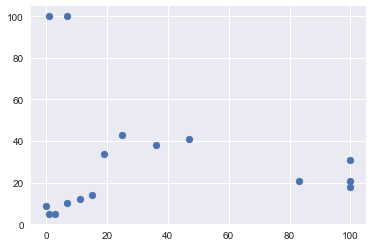

In [4]:
# How many clusters does it look like we have?
plt.scatter(lang['german'], lang['english'])
plt.show()

Now, let's convert our data to a matrix (aka array) to pass to the clustering algorithm - the matrix makes it easier for our algorithm to compute distance:

In [5]:
X = lang.as_matrix(columns=None)

Next, we'll implement the actual clustering algorithm using the **`ward`** method (described in detail earlier):

In [6]:
Z = linkage(X, 'ward')
Z

array([[   0.        ,    8.        ,   10.48808848,    2.        ],
       [   6.        ,   15.        ,   17.29161647,    2.        ],
       [   5.        ,    9.        ,   37.12142239,    2.        ],
       [   2.        ,    4.        ,   82.06704576,    2.        ],
       [  16.        ,   18.        ,  103.69667304,    4.        ],
       [  11.        ,   12.        ,  115.41230437,    2.        ],
       [  10.        ,   21.        ,  119.93887332,    3.        ],
       [   1.        ,   19.        ,  133.66500415,    3.        ],
       [  14.        ,   23.        ,  139.49253266,    4.        ],
       [   7.        ,   24.        ,  142.18473898,    5.        ],
       [  13.        ,   25.        ,  148.66068747,    6.        ],
       [  17.        ,   22.        ,  158.59529207,    5.        ],
       [   3.        ,   20.        ,  191.10991602,    5.        ],
       [  26.        ,   27.        ,  192.04241956,   11.        ],
       [  28.        ,   29.      

Now we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:

In [7]:
c, coph_dists = cophenet(Z, pdist(X))

In [8]:
c

0.66645925603242939

You should see a **C** around **0.667**, which means that the distances of the clusters are moderately related to the original distances of the data.

Now, let's plot the dendrogram. To do this, we call dendrogram from  scipy.cluster.hierarchy and input our links, and rotate the labels so we can view the graph in a more organized matter. 

#### We can then plot the denrogram with pyplot from matplotlib.

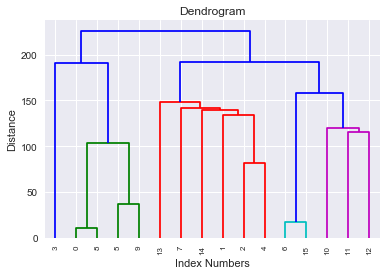

In [9]:
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(lang)

### Determining the clusters

While there are many ways to automate this process, we can visually assess the dendrogram and set a maximum distance to help estimate the clusters.

Here, we can see that no links exist above a distance of 200 - use the ```fclusters``` function from ```scipy.cluster.hierarchy``` with this max distance to return our cluster IDs. 

In [10]:
max_dist = 200 # pairwise distance
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

Last, let's plot our data and assign the class labels as the color:

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [28]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
    ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

Clusters represented at distance:  set([1, 2])


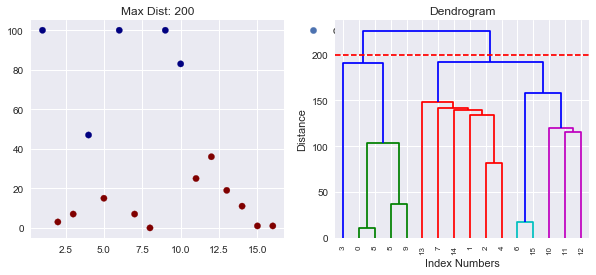

In [29]:
interact(plot_wrapper, max_dist=IntSlider(min=100, max=200, step=1))

Clusters represented at distance:  set([1])


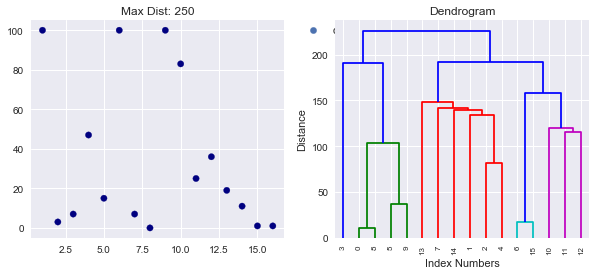

Clusters represented at distance:  set([1, 2])


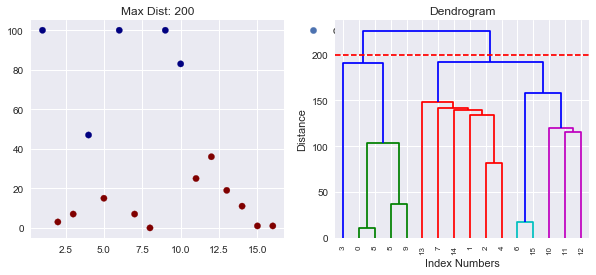

Clusters represented at distance:  set([1, 2, 3, 4, 5])


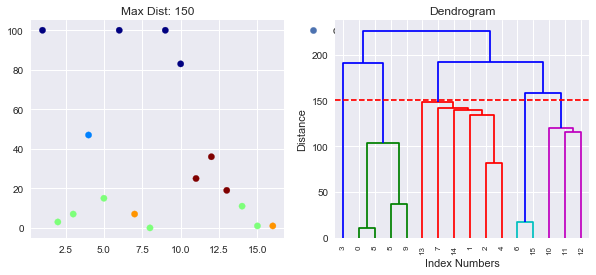

Clusters represented at distance:  set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


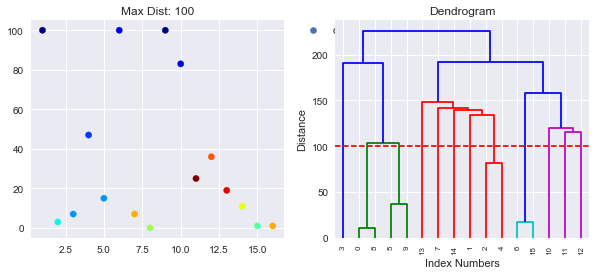

Clusters represented at distance:  set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])


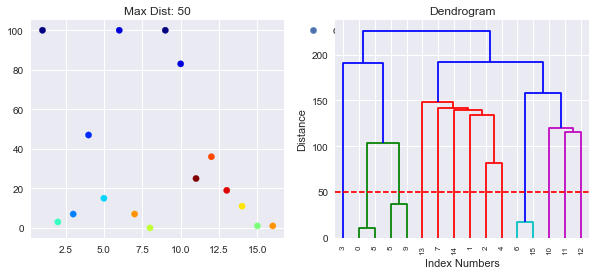

Clusters represented at distance:  set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


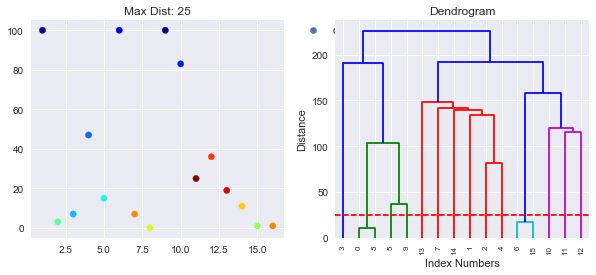

In [31]:
plot_dist_threash(250)
plot_dist_threash(200)
plot_dist_threash(150)
plot_dist_threash(100)
plot_dist_threash(50)
plot_dist_threash(25)

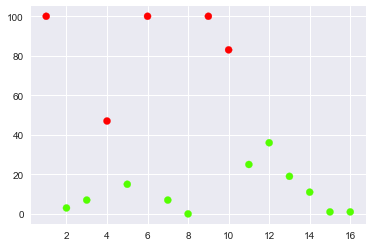

In [32]:
plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism', s=50)
plt.show()

<a name="conclusion"></a>
## Conclusion
---

- Recall the definitions of linkage, cophenetic coefficient, and dendrogram
- Recap and recall the process steps in hierachical clustering
    - Linkage: First, we create the linkages in python that form the basis of our analysis
    - Cophenetic Coefficient: We find the cophenetic coefficient to determine how well our analysis is running
    - Dendrogram: We plot the dendrogram and visually inspect the clusters
    - Lastly, we find our cluster ID's and plot

<a id='resources'></a>
## Additional resources 

---

- [SciPy Documentation for Linkage techniques](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [What even is this Hierarchical Clustering Thing, Anyway?](http://www.saedsayad.com/clustering_hierarchical.htm)
- [SKlearn docs](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) on hierarchical clustering
- [Stanford walkthrough of hierarchical clustering](http://www.econ.upf.edu/~michael/stanford/maeb7.pdf)
- [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering) on hierarchical clustering
- [Example of hierarchical clustering US cities](http://www.analytictech.com/networks/hiclus.htm)
- [Cophenetic correlation wikipedia](https://en.wikipedia.org/wiki/Cophenetic_correlation) on cophrenetic coefficients
- [Cophenetic intuitive explanation](http://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm) of cophrenetic coefficients
- [Joseph Nelson's video](https://www.youtube.com/watch?v=62cphKGR0_s) explaining hierarchical clustering in seven minutes 
- A contrasting example of differing [cophrenetic coefficients](http://stats.stackexchange.com/questions/33066/on-cophenetic-correlation-for-dendrogram-clustering)